## Classification example

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Get the data

In [2]:
diabetes = pd.read_csv("files/pima-indians-diabetes.csv")

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Normalize columns

In [5]:
cols_to_normalize = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
#When axis=0(default), applies function to each column
#When axis=1, applies function to each row
diabetes[cols_to_normalize] = diabetes[cols_to_normalize].apply(lambda x: (x-x.min())/(x.max()-x.min()),axis=0) 

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


### OneHotEncode Age and Group

> Age should be encoded because we want our model to treat all ages unbiased.

> However, we do not want to use **one hot encoding** for all age numbers. So we just bin them

**Bin the age**

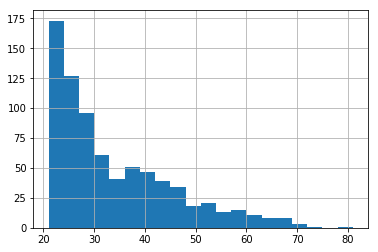

In [8]:
diabetes["Age"].hist(bins=20)

In [9]:
cols = diabetes.columns
arr = diabetes.values

age = arr[:,7]
age_categories = [10,20,25,30,35,40,45,50,60,70,80,90,100]
bins = [(0,10),(11,20),(21,25),(25,30),(31,35),(36,40),(41,45),(46,50),(51,60),(61,70),(71,80),(81,90),(91,100)]
for b in bins:
    #cannot use 'and'. The format of logical and inside np.where is important 
    age = np.where((age>=b[0])&(age<=b[1]),b[1],age)
age[:20]

array([50, 35, 35, 30, 35, 30, 30, 30, 60, 60, 30, 35, 60, 60, 60, 35, 35,
       35, 35, 35], dtype=object)

In [10]:
arr[:,7] = age
pd.DataFrame(arr,columns=cols).head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0,0.500745,0.234415,50,1,B
1,0.0588235,0.427136,0.540984,0.292929,0,0.396423,0.116567,35,0,C
2,0.470588,0.919598,0.52459,0,0,0.347243,0.253629,35,1,B
3,0.0588235,0.447236,0.540984,0.232323,0.111111,0.418778,0.0380017,30,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,35,1,C


**Encode**

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

See **Refresher_sklearn** for details

In [13]:
colT = ColumnTransformer([("1",OneHotEncoder(),[9]),("2",OneHotEncoder(categories=[age_categories]),[7])])
colT_fit = colT.fit(arr)
np.array(colT_fit.get_feature_names())

array(['1__x0_A', '1__x0_B', '1__x0_C', '1__x0_D', '2__x0_10', '2__x0_20',
       '2__x0_25', '2__x0_30', '2__x0_35', '2__x0_40', '2__x0_45',
       '2__x0_50', '2__x0_60', '2__x0_70', '2__x0_80', '2__x0_90',
       '2__x0_100'], dtype='<U9')

In [19]:
tr = colT_fit.transform(arr).toarray() #Returns just the transformed cols
print(tr.shape, arr.shape)
features = np.concatenate((arr[:,[0,1,2,3,4,5,6]],tr),axis=1) #specify all columns excetp 7 and 9
labels = arr[:,8]
print(features.shape)
print(labels.shape)

(768, 17) (768, 10)
(768, 24)
(768,)


In [15]:
pd.DataFrame(features).head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.352941,0.743719,0.590164,0.353535,0,0.500745,0.234415,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.0588235,0.427136,0.540984,0.292929,0,0.396423,0.116567,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.470588,0.919598,0.52459,0,0,0.347243,0.253629,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.0588235,0.447236,0.540984,0.232323,0.111111,0.418778,0.0380017,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,1,0,0,...,0,1,0,0,0,0,0,0,0,0


### Reduce dimwith PCA and Visualize 

We need to find two dimensions that correspond to maximum variance

> **Step 1:** Compute the mean of every column and subtract the mean from every row entry (to make mean=0)

> **Step 2:** Compute Covariance matrix **S = (1/768)xfeatures.Txfeatures** (resultinf dim is 24x24)

> **Step 3:** Compute eigen values(u) and eigen vecs(v) of S

> **Step 4:** Pick the eigen vecs corresponding to top 2 eigen values

> **Step 5:** transformed = features.dot(v[:2])

In [341]:
fd = pd.DataFrame(features)
fd = fd.sub(fd.mean(axis=0),axis=1)
fd.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.126762,0.136208,0.0237257,0.146096,-0.0943256,0.0239556,0.0662356,-0.251302,0.744792,-0.242188,...,-0.542969,-0.105469,-0.0989583,-0.0989583,0.951823,-0.0703125,-0.0325521,-0.00130208,-0.00130208,0
1,-0.167356,-0.180375,-0.0254547,0.0854903,-0.0943256,-0.0803663,-0.0516124,-0.251302,-0.255208,0.757812,...,-0.542969,0.894531,-0.0989583,-0.0989583,-0.0481771,-0.0703125,-0.0325521,-0.00130208,-0.00130208,0
2,0.244409,0.312088,-0.0418481,-0.207439,-0.0943256,-0.129547,0.0854499,-0.251302,0.744792,-0.242188,...,-0.542969,0.894531,-0.0989583,-0.0989583,-0.0481771,-0.0703125,-0.0325521,-0.00130208,-0.00130208,0
3,-0.167356,-0.160274,-0.0254547,0.0248843,0.0167855,-0.0580116,-0.130178,-0.251302,0.744792,-0.242188,...,0.457031,-0.105469,-0.0989583,-0.0989583,-0.0481771,-0.0703125,-0.0325521,-0.00130208,-0.00130208,0
4,-0.22618,0.080932,-0.238569,0.146096,0.104256,0.165535,0.775458,-0.251302,-0.255208,0.757812,...,-0.542969,0.894531,-0.0989583,-0.0989583,-0.0481771,-0.0703125,-0.0325521,-0.00130208,-0.00130208,0


In [335]:
fd_mat = fd.values.astype(np.float32)
sigma = np.matmul(fd_mat.T,fd_mat)*(1/768.)
sigma.shape

(24, 24)

In [342]:
s,v = np.linalg.eig(sigma)
s.shape,v.shape

((24,), (24, 24))

In [337]:
s #already sorted

array([ 3.23803663e-01,  2.52550215e-01,  2.46000439e-01,  2.43827581e-01,
        1.04877636e-01,  9.85683203e-02,  7.83989355e-02,  5.36751635e-02,
        4.36354019e-02,  3.58486213e-02,  2.35608369e-02,  2.15911418e-02,
        1.97195131e-02,  1.66409109e-02,  1.08830947e-02,  7.96141941e-03,
        1.27117056e-03,  1.63565518e-03, -4.38208296e-08, -1.22288967e-07,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
      dtype=float32)

In [338]:
v = v[:,:2]
transformed = fd_mat.dot(v)
transformed[:5]

array([[ 0.773845  , -0.26131323],
       [ 0.5247501 ,  0.0613456 ],
       [ 0.94188464, -0.23481803],
       [-0.21943702, -0.25583187],
       [ 0.53408265,  0.05825566]], dtype=float32)

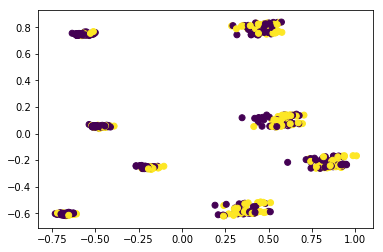

In [339]:
plt.scatter(transformed[:,0],transformed[:,1],c=labels)

### Build Neural network

In [240]:
tf.reset_default_graph()
batch_size = 10
inp = tf.placeholder(tf.float32,(batch_size,24))
target = tf.placeholder(tf.float32,(batch_size,))

In [241]:
W1 = tf.Variable(tf.random_normal((24,20),dtype=tf.float32))
tf.add_to_collection('l2',W1)
B1 = tf.Variable(tf.ones((20),dtype=tf.float32))
H1 = tf.add(tf.matmul(inp,W1), B1) #(b,24)x(24,20) + (20,)
Z1 = tf.nn.relu(H1)

In [242]:
W2 = tf.Variable(tf.random_normal((20,10),dtype=tf.float32))
tf.add_to_collection('l2',W2)
B2 = tf.Variable(tf.ones((10),dtype=tf.float32))
H2 = tf.add(tf.matmul(Z1,W2), B2) #(b,20)x(20,10) + (10,)
Z2 = tf.nn.relu(H2)

In [243]:
W3 = tf.Variable(tf.random_normal((10,1),dtype=tf.float32))
tf.add_to_collection('l2',W3)
B3 = tf.Variable(1.0)
H3 = tf.add(tf.matmul(Z2,W3), B3) #(b,10)x(10,1) + (1,)
output = tf.sigmoid(H3)

In [244]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    rand_int = np.random.randint(0,len(features),size=batch_size)
    o = sess.run(output,feed_dict={inp:features[rand_int],target:labels[rand_int]})
    print(o)
    

[[9.8454154e-01]
 [6.3882275e-03]
 [9.3811923e-01]
 [9.0619869e-04]
 [9.9988139e-01]
 [9.5650649e-01]
 [9.9973220e-01]
 [9.7148919e-01]
 [9.8423034e-01]
 [1.0000000e+00]]


**Binary cross entropy loss function**:

> Beware of log 0

> Add L2 regularizer

In [245]:
delta=1e-8 #TO get rid of the log 0 problem
binary_cross_entropy = -(target*tf.math.log(output+delta) + ((1.-target)*tf.math.log(1.-output+delta)))
#Add L2 regularizer
l2_reg = 0.
for w in tf.get_collection('l2'):
    l2_reg += tf.reduce_sum(tf.square(w)) 
l2_reg = 0.01*l2_reg
loss = tf.reduce_mean(binary_cross_entropy) + l2_reg

In [246]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    rand_int = np.random.randint(0,len(features),size=batch_size)
    o = sess.run(loss,feed_dict={inp:features[rand_int],target:labels[rand_int]})
    print(o)

10.810688


**Optimizer**

In [247]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
grads = optimizer.compute_gradients(loss)

In [248]:
grads

[(<tf.Tensor 'gradients/AddN_3:0' shape=(24, 20) dtype=float32>,
  <tf.Variable 'Variable:0' shape=(24, 20) dtype=float32_ref>),
 (<tf.Tensor 'gradients/Add_grad/tuple/control_dependency_1:0' shape=(20,) dtype=float32>,
  <tf.Variable 'Variable_1:0' shape=(20,) dtype=float32_ref>),
 (<tf.Tensor 'gradients/AddN_2:0' shape=(20, 10) dtype=float32>,
  <tf.Variable 'Variable_2:0' shape=(20, 10) dtype=float32_ref>),
 (<tf.Tensor 'gradients/Add_1_grad/tuple/control_dependency_1:0' shape=(10,) dtype=float32>,
  <tf.Variable 'Variable_3:0' shape=(10,) dtype=float32_ref>),
 (<tf.Tensor 'gradients/AddN_1:0' shape=(10, 1) dtype=float32>,
  <tf.Variable 'Variable_4:0' shape=(10, 1) dtype=float32_ref>),
 (<tf.Tensor 'gradients/Add_2_grad/tuple/control_dependency_1:0' shape=() dtype=float32>,
  <tf.Variable 'Variable_5:0' shape=() dtype=float32_ref>)]

In [250]:
train = optimizer.apply_gradients(grads)

In [251]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(10000):
        rand_ind = np.random.randint(0,len(features),size=batch_size)
        feed = {inp:features[rand_ind],target:labels[rand_ind]}
        _,l = sess.run([train,loss],feed_dict=feed)
        if i%1000 == 0:
            print(l)

8.555622
5.077383
3.6301415
2.6503031
1.8849335
1.6051619
1.2165829
1.2359965
0.9495561
0.8000469
